# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

### Assignments 1: 
#### Find `Most Common Words` and create word cloud.

#### Read in the document-term matrix

In [1]:

import pickle
# pcikle file store in binary file format and is consistant 
# throughout the process

import pandas as pd

file  = open("02D_dtm.pkl","rb")
dtm_df = pickle.load(file)
type(dtm_df)


pandas.core.frame.DataFrame

#### Find  and print the top 30 words said by each musician


In [2]:
# this line will create a data frame where index which is row name will be equal to 
# row names of dtm_df and columns will be in range 0 to 29 and this created dataframe will
# be filled with nan values
top_30_words_per_row = pd.DataFrame(index=dtm_df.index, columns=range(30))


type(dtm_df)
for row_index in dtm_df.index:
    # Sort the words based on frequency in the current row
    # dtm_df.loc[row_index].sort_values(ascending=False) 
    # select a row and sort each row based on the frequency of words
    sorted_word_frequencies = dtm_df.loc[row_index].sort_values(ascending=False)
    
    print(sorted_word_frequencies)

viktor         25
sams           24
sail           13
imogene        11
rufus          11
               ..
fullon          0
fulfillment     0
fulfilled       0
fucks           0
éponine         0
Name: Death and other, Length: 5198, dtype: int64
blow            81
penis           70
teeth           34
sort            34
balls           24
                ..
higher           0
highest          0
highlighting     0
highstakes       0
largely          0
Name: Jacqueline, Length: 5198, dtype: int64
kev          53
wee          32
cos          28
mate         26
quite        19
             ..
hayes         0
hazard        0
headed        0
headlines     0
éponine       0
Name: Kevin, Length: 5198, dtype: int64
friends    33
dating     24
single     21
sleep      20
parents    17
           ..
goody       0
goof        0
googles     0
gordon      0
éponine     0
Name: Taylor, Length: 5198, dtype: int64
kerry       69
crowd       63
hey         61
cheering    55
david       44
            

#### By looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that. Look at the most common top words and add them to the stop word list.



In [3]:
# Extract the top 30 words
top_30_words = sorted_word_frequencies.head(30).index
    
    # Store the top 30 words in the new DataFrame
top_30_words_per_row.loc[row_index] = top_30_words
    
type(top_30_words_per_row)

#all_top_words = top_30_words_per_row.values.flatten()
#all_top_words
#word_counts = pd.Series(all_top_words).value_counts()
#word_counts

stop_words_list = ['wee', 'rufus', 'kev', 'cos', 'éponine', 'nwa']

type(stop_words_list)


list

#### Let's aggregate this list and identify the most common words along with how many routines they occur in


In [4]:
import numpy as np
# Drop the specified columns
filtered_df = dtm_df.drop(columns=stop_words_list)

unique_words = np.unique(top_30_words_per_row.astype(str).values.flatten())


# Now, unique_words contains the unique words across all columns
print(unique_words)

type(unique_words)

unique_words = unique_words.astype(str).tolist()

def count_occurrences_for_words(dataframe, word_list):
    """
    Count occurrences of each word in the list along the rows of the dataframe.

    Parameters:
    - dataframe: pd.DataFrame, the input DataFrame containing words in each row
    - word_list: list, the list of words to count occurrences for

    Returns:
    - dict, a dictionary with words as keys and their corresponding count of occurrences as values
    """
    word_counts = {}

    for word in word_list:
        occurrences_per_row = dataframe.apply(lambda row: word in row.values, axis=1)
        count_of_occurrences = occurrences_per_row.sum()
        
        if(count_of_occurrences >= 5) :
            word_counts[word] = count_of_occurrences

    return word_counts

result = count_occurrences_for_words(top_30_words_per_row, unique_words)
type(result)

len(list(result.keys()))

['brother' 'champion' 'cheering' 'chuckles' 'crowd' 'david' 'doris'
 'erich' 'forever' 'fritz' 'grunting' 'grunts' 'harley' 'heavyweight'
 'hey' 'indistinct' 'kerry' 'kev' 'mike' 'nan' 'nwa' 'pam' 'pop' 'race'
 'referee' 'ric' 'ring' 'sighs' 'softly' 'son' 'von']


0

#### If more than half of the comedians have it as a top word, exclude it from the list


In [5]:
# Drop columns from DataFrame only if they are present
for column in result.keys():
    if column in filtered_df.columns:
        filtered_df = filtered_df.drop(columns=column)

# Now, filtered_df has columns dropped only if they were present in the DataFrame
print(filtered_df)


                 aaababout  abandon  abandoned  abdomen  abercrombie  abigail  \
Death and other          1        0          0        0            0        0   
Jacqueline               0        0          0        1            3        1   
Kevin                    0        3          1        0            0        0   
Taylor                   0        0          1        0            0        0   
The iron claw            0        0          0        0            0        0   

                 abilities  absentminded  absinthe  absolute  ...  youth  \
Death and other          1             0         0         0  ...      0   
Jacqueline               0             1         0         0  ...      1   
Kevin                    0             0         1         0  ...     11   
Taylor                   0             0         0         0  ...      1   
The iron claw            0             0         0         3  ...      0   

                 youtubers  yup  zac  zero  zipper  zoom

In [6]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
file1= open("02D_data_clean.pkl","rb")
cleaned_data = pickle.load(file1)
# Add new stop words
new_stop_words = ['wee', 'rufus', 'kev', 'cos', 'éponine', 'nwa']
stop_words = list(text.ENGLISH_STOP_WORDS.union(new_stop_words))

# Recreate document-term matrix
vectorizer = CountVectorizer(stop_words=stop_words)
dtm = vectorizer.fit_transform(cleaned_data)

# Pickle it for later use
with open('02D_document_term_matrix.pkl', 'wb') as f:
    pickle.dump(dtm, f)

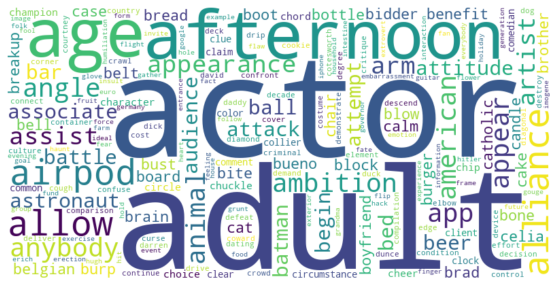

In [7]:
# Let's make some word clouds!
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all words from all columns into a single string
text = ' '.join(filtered_df.columns)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud


In [8]:
# Reset the output dimensions
import matplotlib.pyplot as plt
for index, row in filtered_df.iterrows():
    # Concatenate all words from the current row into a single string
    text = ' '.join(row.index.astype(str))

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# Create subplots for each musicians
    # Plot and save the WordCloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Row Index {index}')
    plt.axis('off')
    plt.savefig(f'wordcloud_row_{index}.png')  # Save the image with a unique filename for each row
    plt.close()  # Close the figure to release resources





In [9]:
top_30_words_per_row = pd.DataFrame(index=filtered_df.index, columns=range(30))


for row_index in filtered_df.index:
    # Sort the words based on frequency in the current row
    # dtm_df.loc[row_index].sort_values(ascending=False) 
    # select a row and sort each row based on the frequency of words
    sorted_word_frequencies = filtered_df.loc[row_index].sort_values(ascending=False)
    
    print(sorted_word_frequencies)

viktor         25
sams           24
sail           13
imogene        11
detective      10
               ..
fulfillment     0
fulfilled       0
fucks           0
fuckedup        0
zuzus           0
Name: Death and other, Length: 5192, dtype: int64
blow           81
penis          70
teeth          34
sort           34
balls          24
               ..
mick            0
middle          0
middleclass     0
midlevel        0
aaababout       0
Name: Jacqueline, Length: 5192, dtype: int64
mate         26
quite        19
son          18
telly        18
everybody    15
             ..
hawaiian      0
hayes         0
hazard        0
headed        0
zuzus         0
Name: Kevin, Length: 5192, dtype: int64
friends      33
dating       24
single       21
sleep        20
parents      17
             ..
goodnight     0
goody         0
goof          0
googles       0
zuzus         0
Name: Taylor, Length: 5192, dtype: int64
kerry       69
crowd       63
hey         61
cheering    55
david       44
 

#### You observations
1. we have removed the words which dont have any meaning to make the machine understand all the words. It is done in order to reduce dimensionality of dataset and improve the quality of analysis.
2. The top most common 30 words are removed from the list to avoid duplicasy.These might not contribute much to analysis.
3. the most common words are blow,pop,ring,etc.

### Assignment 2:
#### Find the number of unique words that each musician uses.

In [10]:
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
count_dataframe = pd.DataFrame(index=filtered_df.index)

# Create a new dataframe that contains this unique word count
# Iterate over each row in your_dataframe
for index, row in filtered_df.iterrows():
    # Count the number of columns with values greater than one for the current row
    count = (row > 1).sum()

    # Assign the count to the corresponding index in count_dataframe
    count_dataframe.at[index, 'count'] = count

# Now, count_dataframe contains the counts with indexes same as your_dataframe
print(count_dataframe)

run_times = [3,5, 2.5, 5  , 4]


                 count
Death and other  167.0
Jacqueline       635.0
Kevin            530.0
Taylor           356.0
The iron claw    381.0


In [11]:
# Calculate the words per minute of each comedian


# Find the total number of words that a comedian uses

# Create an empty DataFrame to store the total sum
new_dataframe = pd.DataFrame(index=filtered_df.index, columns=['total_sum'])

for index, row in filtered_df.iterrows():
    # Calculate the total sum for the current row
    total_sum = row.sum()

    # Assign the total sum to the corresponding index in total_sum_dataframe
    new_dataframe.at[index, 'total_sum'] = total_sum

# Now, total_sum_dataframe contains the total sum with indexes same as your_dataframe
print(new_dataframe)

new_dataframe['run_times'] = run_times 

# add some columns to our dataframe: 'total_words', 'run_times' and 'words_per_minute'

new_dataframe['words_per_minute'] = new_dataframe['total_sum']/new_dataframe['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest

new_dataframe_sorted = new_dataframe.sort_values(by='words_per_minute', ascending=True)

# Display the sorted DataFrame
print(new_dataframe_sorted)


                total_sum
Death and other      1117
Jacqueline           3614
Kevin                3062
Taylor               2016
The iron claw        2904
                total_sum  run_times words_per_minute
Death and other      1117        3.0       372.333333
Taylor               2016        5.0            403.2
Jacqueline           3614        5.0            722.8
The iron claw        2904        4.0            726.0
Kevin                3062        2.5           1224.8


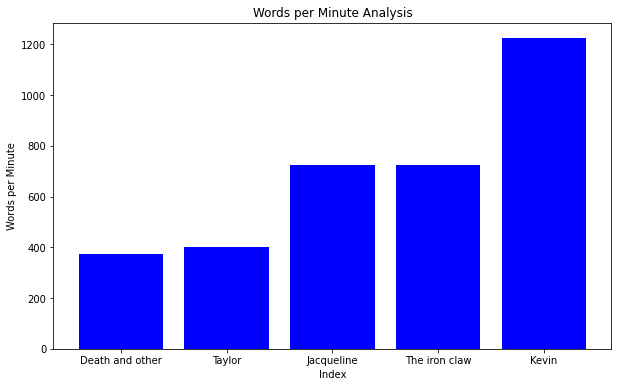

In [12]:

# plot our findings
import matplotlib.pyplot as plt

# Assuming 'new_dataframe_sorted' is your DataFrame with the 'words_per_minute' column calculated and sorted

# Plot the 'words_per_minute' values
plt.figure(figsize=(10, 6))
plt.bar(new_dataframe_sorted.index, new_dataframe_sorted['words_per_minute'], color='blue')
plt.xlabel('Index')
plt.ylabel('Words per Minute')
plt.title('Words per Minute Analysis')
plt.show()


#### Write your findings. For example:
* **Vocabulary**
   * Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
   * Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary


* **Talking Speed**
   * Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
   * Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow
   
Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.

### Assignment 3: 
#### Check the profanity by analysing the common bad words, like `fucking`, `fuck`, `shit etc.

In [13]:
# take a look at the most common words.
profanity_words = ['fucking', 'fuck', 'shit', 'asshole', 'bitch', 'damn','fck','porn','sex','sexy']

In [14]:
# isolate just these bad words
result_df = pd.DataFrame()
result_df

""


                 fucking  fuck  shit  asshole  bitch  damn  fck  porn  sex  \
Death and other  fucking  fuck  shit  asshole  bitch  damn  fck  porn  sex   
Jacqueline       fucking  fuck  shit  asshole  bitch  damn  fck  porn  sex   
Kevin            fucking  fuck  shit  asshole  bitch  damn  fck  porn  sex   
Taylor           fucking  fuck  shit  asshole  bitch  damn  fck  porn  sex   
The iron claw    fucking  fuck  shit  asshole  bitch  damn  fck  porn  sex   

                 sexy  
Death and other  sexy  
Jacqueline       sexy  
Kevin            sexy  
Taylor           sexy  
The iron claw    sexy  


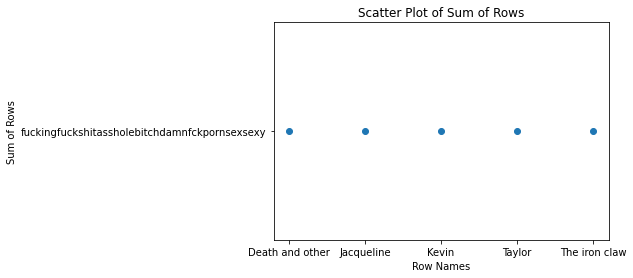

In [15]:
# create a scatter plot of your findings
# Iterate through each row
for index, row in filtered_df.iterrows():
    # Initialize a dictionary to store the sum of values for profanity words
    sum_dict = {word: 0 for word in profanity_words}

    # Iterate through profanity words
    for word in profanity_words:
        # Check if the word is a column in the dataframe
        if word in filtered_df.columns:
            # Add the value to the sum
            sum_dict[word] += row[word]

    # Append the sum values for the current row to the result dataframe
    result_df[index] = sum_dict

# Transpose the final dataframe
result_df = result_df.T

print(result_df)


result_df = result_df.sum(axis=1)

# Creating a scatter plot
plt.scatter(result_df.index, result_df.values)

# Adding labels and title
plt.xlabel('Row Names')
plt.ylabel('Sum of Rows')
plt.title('Scatter Plot of Sum of Rows')

# Displaying the plot
plt.show()

### Write your findings. 

* **recogising words** -1) lot they said we do you know how a lot of people have a safe word to stop s-word everyone needs to have a safe word during fights.

* 2)through jingle bells im like i s*** i shouldve started at  ill never catch up i already know how to play clarinet

#### For example:
* **Averaging 2 F-Bombs Per Minute!** - I don't like too much swearing, especially the f-word, which is probably why I've never heard of Bill Bur, Joe Rogan and Jim Jefferies.
* **Clean Humor** - It looks like profanity might be a good predictor of the type of comedy I like. Besides Ali Wong, my two other favorite comedians in this group are John Mulaney and Mike Birbiglia.

### Assignment 4:(optional)
What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

                 joy  happiness  love  excitement  satisfaction  success  \
Death and other  joy  happiness  love  excitement  satisfaction  success   
Jacqueline       joy  happiness  love  excitement  satisfaction  success   
Kevin            joy  happiness  love  excitement  satisfaction  success   
Taylor           joy  happiness  love  excitement  satisfaction  success   
The iron claw    joy  happiness  love  excitement  satisfaction  success   

                 achievement  accomplishment  triumph  victory  ...  \
Death and other  achievement  accomplishment  triumph  victory  ...   
Jacqueline       achievement  accomplishment  triumph  victory  ...   
Kevin            achievement  accomplishment  triumph  victory  ...   
Taylor           achievement  accomplishment  triumph  victory  ...   
The iron claw    achievement  accomplishment  triumph  victory  ...   

                 creativity  innovation  imagination  ingenuity  originality  \
Death and other  creativity  innovat

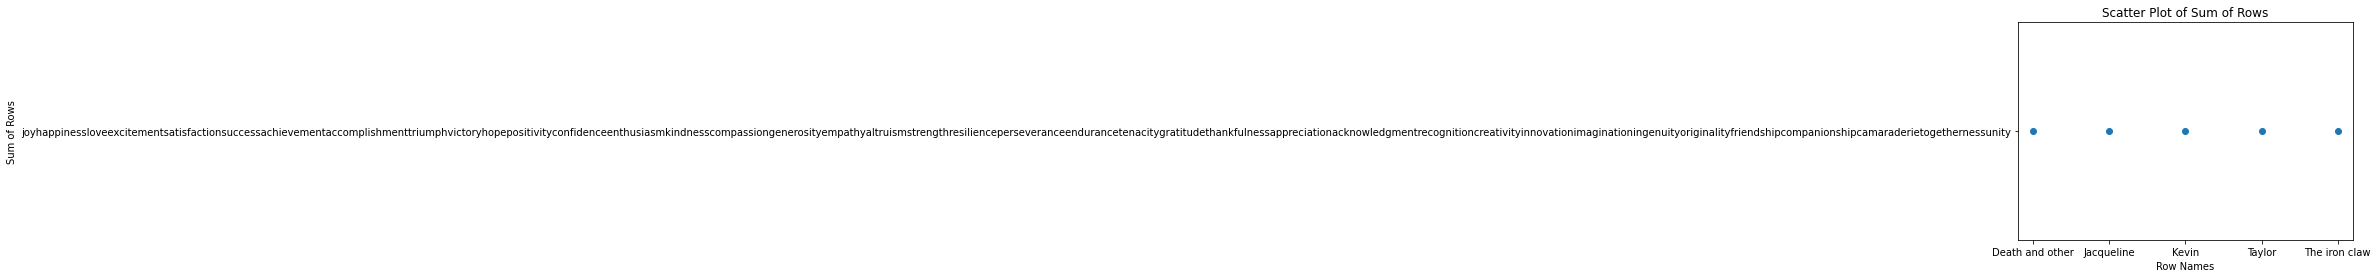

In [16]:

positive_words = [
    'joy', 'happiness', 'love', 'excitement', 'satisfaction',
    'success', 'achievement', 'accomplishment', 'triumph', 'victory', 'hope', 'positivity', 'confidence', 'enthusiasm',
    'kindness', 'compassion', 'generosity', 'empathy', 'altruism','strength', 'resilience', 'perseverance', 'endurance', 
    'tenacity','gratitude', 'thankfulness', 'appreciation', 'acknowledgment', 'recognition','creativity',
    'innovation', 'imagination', 'ingenuity', 'originality',
    'friendship', 'companionship', 'camaraderie', 'togetherness', 'unity'
]


# isolate just these bad words

result_df_two = pd.DataFrame()

# Iterate through each row
for index, row in filtered_df.iterrows():
    # Initialize a dictionary to store the sum of values for profanity words
    sum_dict = {word: 0 for word in positive_words}

    # Iterate through profanity words
    for word in positive_words:
        # Check if the word is a column in the dataframe
        if word in filtered_df.columns:
            # Add the value to the sum
            sum_dict[word] += row[word]

    # Append the sum values for the current row to the result dataframe
    result_df_two[index] = sum_dict

# Transpose the final dataframe
result_df_two = result_df_two.T

print(result_df_two)
# Iterate through each row

result_df_two = result_df_two.sum(axis=1)

# Creating a scatter plot
plt.scatter(result_df_two.index, result_df_two.values)

# Adding labels and title
plt.xlabel('Row Names')
plt.ylabel('Sum of Rows')
plt.title('Scatter Plot of Sum of Rows')

# Displaying the plot
plt.show()

In [17]:
from collections import Counter
text = data_clean1.transcript[Authors]
words = text.split()
word_count = Counter(words)
print(word_count)

NameError: name 'data_clean1' is not defined